In [1]:
from pylab import *

Método de Rune-Kutta de 2do orden 
$$
\vec x_{n+1} = \vec x_{n} + \delta\vec g(k_1,t_{n+\frac{1}{2}})
$$
donde
$$
k_2 = \vec x_n +\frac{\delta}{2}\vec g(\vec x_n,\vec t_n)
$$

In [2]:
def RK2(EDO,ci,titf,delta=0.1):
    t = arange(titf[0],titf[1]+delta,delta)
    sol = zeros( (len(ci),len(t)) )
    sol[:,0] = array(ci)
    for n in range(len(t)-1):
        k2 = sol[:,n] + 0.5*delta*EDO(t[n],sol[:,n]) 
        tm = t[n] + 0.5*delta
        sol[:,n+1] = sol[:,n] + delta*EDO(tm,k2) #RK2
    return sol,t

In [3]:
def sist_ec1(t,x,omega2 = 1):
    # x = theta , u
    return array( [x[1] , -omega2*x[0]] )

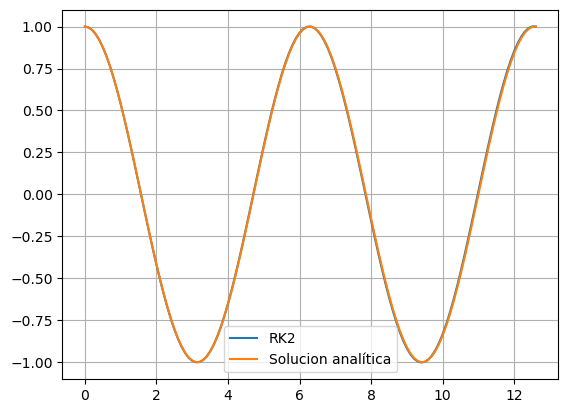

In [4]:
th_dth,t = RK2(sist_ec1,[1,0],[0,4*pi])
plot(t,th_dth[0,:],label="RK2")
plot(t,cos(t),label="Solucion analítica")
legend()
grid()
show()

In [5]:
def pendulo(t,x,omega2 = 1):
    # x = theta , u
    return array( [ x[1] , -omega2*sin(x[0]) ] )

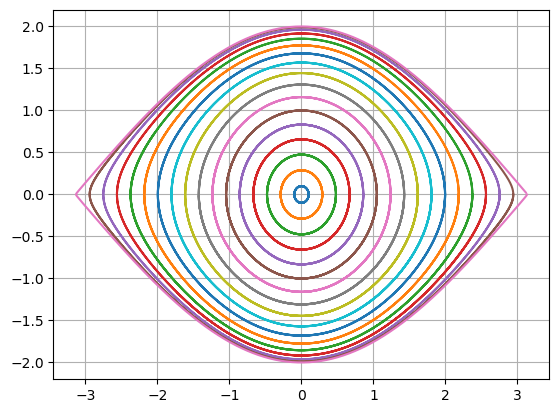

In [6]:
cis = linspace(0.1,pi-0.01,17)
for th0 in cis:
    th_dth,t = RK2(pendulo,[th0,0],[0,8*pi],delta=0.01)
    plot(th_dth[0,:],th_dth[1,:])
grid()
show()

## Runge.Kuta de 4to orden

In [7]:
def RK4(EDO,ci,titf,delta=0.1):
    t = arange(titf[0],titf[1]+delta,delta)
    sol = zeros( (len(ci),len(t)) )
    sol[:,0] = array(ci)
    for n in range(len(t)-1):
        tm = t[n] + 0.5*delta
        k1 = EDO(t[n],sol[:,n])
        k2 = EDO(tm,sol[:,n]+0.5*delta*k1)
        k3 = EDO(tm,sol[:,n]+0.5*delta*k2)
        k4 = EDO(tm,sol[:,n]+delta*k3)
        sol[:,n+1] = sol[:,n] + (k1+2*k2+2*k3+k4)*(delta/6)
    return sol,t

t con RK2 6285 	 t con RK4 127


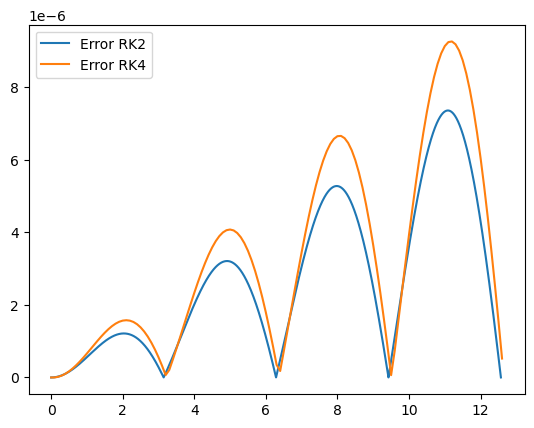

In [8]:
solRk2,t2 = RK2(sist_ec1,[1,0],[0,4*pi],delta = 0.002)
plot(t2,abs(solRk2[0,:]-cos(t2)),label = "Error RK2")
solRK4 , t4 = RK4(sist_ec1,[1,0],[0,4*pi])
plot(t4,abs(solRK4[0,:]-cos(t4)),label = "Error RK4")
print("t con RK2", len(t2),"\t t con RK4", len(t4))
legend()
show()

In [9]:
def RK4_dev(EDO,ci,titf,*args,delta=0.1):
    t = arange(titf[0],titf[1]+delta,delta)
    sol = zeros( (len(ci),len(t)) )
    sol[:,0] = array(ci)
    for n in range(len(t)-1):
        tm = t[n] + 0.5*delta
        k1 = EDO(t[n],sol[:,n],*args)
        k2 = EDO(tm,sol[:,n]+0.5*delta*k1,*args)
        k3 = EDO(tm,sol[:,n]+0.5*delta*k2,*args)
        k4 = EDO(tm,sol[:,n]+delta*k3,args)
        sol[:,n+1] = sol[:,n] + (k1+2*k2+2*k3+k4)*(delta/6)
    return sol,t

## Pendulo con fricción

$$ 
\ddot \theta = -\omega^2\sin\theta-\gamma\dot\theta
$$
o bien
$$
\dot\theta = u \\
\dot u = -\omega^2\sin\theta-\gamma\dot\theta
$$

In [10]:
def pendulo_fric(t,x,omega2 = 1, gamma = 0.1):
    # x = theta , u
    return array( [ x[1] , -omega2*sin(x[0])-gamma*x[1] ] )

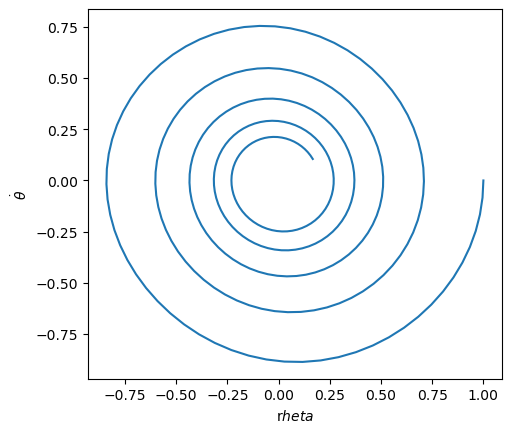

In [11]:
sol,t = RK4(pendulo_fric,[1,0],[0,10*pi],delta = 0.1)
plot(sol[0,:],sol[1,:])
xlabel('r$\theta$'),ylabel(r'$\dot \theta$')
gca().set_aspect('equal')
show()

In [12]:
def func(a,*args):
    print(a)
    func2(args)
def func2(b):
    for bi in b:
        print(bi)

In [13]:
func(1,9,10,"hola")

1
9
10
hola
